> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


### DataSet Details:
>This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
including user ratings and revenue.The dataset contains a total of 21 columns.The project aim is to explore this dataset
and try to search and answer at least 2 questions concerning the dataset.

### Questions to be answered : 
- does number of cast affect the movie budget and revenue? 
- relationship between movie budget and revenue. 
- Which genres are most popular from year to year?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

> We started by loading Data From tmdb-movies.csv  , we can see that the data has problems in somce columns that are nested like cast and genre,other problems due to the existence of null values and duplicate records.The most prominant columns with null values were homepage,tagline,keywords and production companies.Fortunatly,there was only one duplicate record.

In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
print(df.info())
print("number of duplicate records : ",df.duplicated().sum())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 

>The next step was data cleaning where I corrected and fixed some rows and added columns that will be useful for future analysis.
- I dropped 'homepage','tagline','keywords','director','overviews' and 'imb_id' columns since they are full of null values(not to mention they are useless in our analysis).
- I removed rows where there are null values in cast,genres and production companies
- I added column castCount which shows the number of casts in each movie.

In [5]:
def cleaning(df):
    df = df[df['genres'].notnull()]
    df = df[df['cast'].notnull()]
    df = df[df['production_companies'].notnull()]
    df = df.drop(['imdb_id','director','homepage','tagline','keywords','overview'],axis=1)
    df = df.drop_duplicates()
    return df

In [6]:
df_fixed = cleaning(df)

In [7]:
#df_notnull.duplicated().sum()
df_fixed.info()
df_fixed.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9791 entries, 0 to 10865
Data columns (total 15 columns):
id                      9791 non-null int64
popularity              9791 non-null float64
budget                  9791 non-null int64
revenue                 9791 non-null int64
original_title          9791 non-null object
cast                    9791 non-null object
runtime                 9791 non-null int64
genres                  9791 non-null object
production_companies    9791 non-null object
release_date            9791 non-null object
vote_count              9791 non-null int64
vote_average            9791 non-null float64
release_year            9791 non-null int64
budget_adj              9791 non-null float64
revenue_adj             9791 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
df_fixed['castCount'] = pd.Series(0, index=df_fixed.index)
count=0
for index, row in df_fixed.iterrows():
     df_fixed.set_value(index,'castCount',len(row['cast'].split("|")))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [9]:
df_fixed.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,castCount
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,5
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,5
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,5
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,5


## Exploratory Data Analysis

In [10]:
def scatter_plot(df,xLabel,yLabel,title):
    plt.scatter(x = df[xLabel],y = df[yLabel])
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()
    return

In [11]:
def bar_plot(df,column,select_variable1,select_variable2,xLabel,yLabel,titlee):
    df = df.loc[(df[column] == select_variable1) | (df[column] == select_variable2)]
    df.plot.bar(x = "Date",title = titlee)
    df.head()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    return

### Research Question 1   does number of cast affect movie budget snd revenue

In [12]:
df_fixed['castCount'].describe()

count    9791.000000
mean        4.911858
std         0.485430
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: castCount, dtype: float64

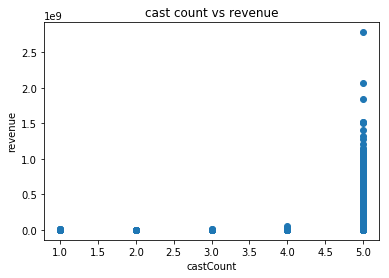

In [13]:
scatter_plot(df_fixed,"castCount","revenue","cast count vs revenue")

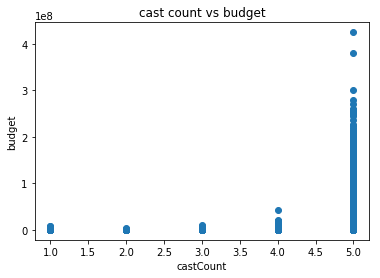

In [14]:
scatter_plot(df_fixed,"castCount","budget","cast count vs budget")

>The first question asked was does number of cast affect revenue or budget? It is very hard to judge because number of movies with casts less 5 is low,and avg number of casts in each movie is 4.8. but we can see that there are alot movies with number of
casts = 5 that have high revenue and exenditure

### Research Question 2  does budget, popularity and runtime affects revenue

In [15]:
print(df_fixed['budget'].describe())
print(df_fixed['popularity'].describe())
print(df_fixed['revenue'].describe())
print(df_fixed['runtime'].describe())

count    9.791000e+03
mean     1.614904e+07
std      3.218700e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.566600e+05
75%      1.900000e+07
max      4.250000e+08
Name: budget, dtype: float64
count    9791.000000
mean        0.693655
std         1.036216
min         0.000188
25%         0.231604
50%         0.419114
75%         0.775201
max        32.985763
Name: popularity, dtype: float64
count    9.791000e+03
mean     4.414650e+07
std      1.224850e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.084034e+07
max      2.781506e+09
Name: revenue, dtype: float64
count    9791.000000
mean      102.861812
std        27.944276
min         0.000000
25%        90.000000
50%       100.000000
75%       112.000000
max       877.000000
Name: runtime, dtype: float64


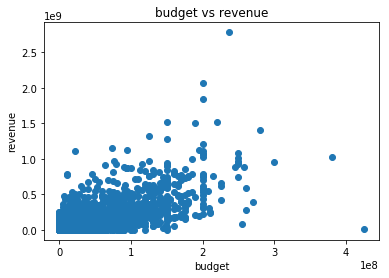

In [16]:
#df_unique.plot.scatter(x= 'budget',y='revenue')
scatter_plot(df_fixed,"budget","revenue","budget vs revenue")

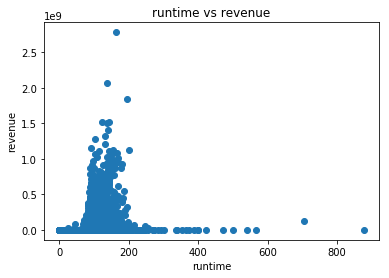

In [17]:
scatter_plot(df_fixed,"runtime","revenue","runtime vs revenue")

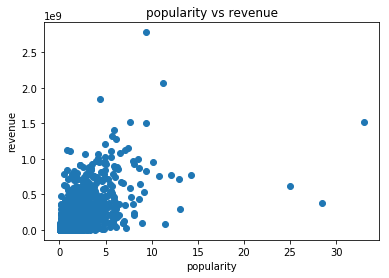

In [18]:
scatter_plot(df_fixed,"popularity","revenue","popularity vs revenue")

- The second question asked was does budget affect revenue? The answer is Yes, as shown in graph revenue has a direct correlation with budget.yet there are some exceptions to the rule(movie with high budget and very low revenue). 
- We also tested if runtime of a movie affects its profit and the results were surprsinig that most movies with high revenue has runtime around 130~150,generally runtime doesnt affect the revenue.
- popularity also has a weak relation,the most 3 famous movies had lower revenue compared to some other movies unexcpetedly.

### Research Question 3  Which genres are most popular from year to year?

In [19]:
df_fixed['release_year'].describe()

count    9791.000000
mean     2000.892759
std        13.037008
min      1960.000000
25%      1994.000000
50%      2005.000000
75%      2011.000000
max      2015.000000
Name: release_year, dtype: float64

In [20]:
Dict = { }
for index, row in df_fixed.iterrows():
     genres = row['genres'].split("|")
     age = row['release_year']
     for genre in genres:
        #print(str(age) in Dict )
        if str(age) in Dict: 
            #print("2om 27a")
            if not(genre in Dict[str(age)]):
                Dict[str(age)][genre] = 0
            Dict[str(age)][genre] += 1
        else:
            if not(age in Dict):
                Dict[str(age)] = {}
            Dict[str(age)][genre] = 1
                

In [21]:
df_genres = pd.DataFrame.from_dict(Dict)
df_genres = np.transpose(df_genres)
df_genres['Date'] = df_genres.index
cols = df_genres.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_genres = df_genres[cols]
df_genres = df_genres.sort_values('Date',ascending = True)
df_genres['Max'] = df_genres[df_genres.columns.tolist()[1:]].idxmax(axis=1)
df_genres['Max'].head(1000)

1960     Drama
1961     Drama
1962     Drama
1963    Comedy
1964     Drama
1965     Drama
1966    Comedy
1967    Comedy
1968     Drama
1969     Drama
1970     Drama
1971     Drama
1972     Drama
1973     Drama
1974     Drama
1975     Drama
1976     Drama
1977     Drama
1978     Drama
1979     Drama
1980     Drama
1981     Drama
1982     Drama
1983     Drama
1984    Comedy
1985    Comedy
1986     Drama
1987    Comedy
1988    Comedy
1989    Comedy
1990     Drama
1991     Drama
1992     Drama
1993     Drama
1994    Comedy
1995     Drama
1996     Drama
1997     Drama
1998     Drama
1999     Drama
2000     Drama
2001    Comedy
2002     Drama
2003    Comedy
2004     Drama
2005     Drama
2006     Drama
2007     Drama
2008     Drama
2009     Drama
2010     Drama
2011     Drama
2012     Drama
2013     Drama
2014     Drama
2015     Drama
Name: Max, dtype: object

In [22]:
df_genres.head()

,Date,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Max
1960,1960,8.0,5.0,NaN,8.0,2.0,NaN,13.0,3.0,2.0,...,7.0,1.0,NaN,6.0,3.0,NaN,6.0,2.0,6.0,Drama
1961,1961,7.0,6.0,1.0,10.0,2.0,NaN,16.0,4.0,1.0,...,3.0,2.0,1.0,7.0,3.0,NaN,NaN,2.0,3.0,Drama
1962,1962,6.0,7.0,NaN,5.0,3.0,NaN,19.0,2.0,1.0,...,5.0,1.0,4.0,5.0,2.0,NaN,7.0,2.0,3.0,Drama
1963,1963,4.0,7.0,1.0,13.0,4.0,NaN,13.0,3.0,2.0,...,9.0,NaN,6.0,8.0,2.0,NaN,10.0,1.0,2.0,Comedy
1964,1964,5.0,5.0,2.0,16.0,10.0,NaN,20.0,4.0,3.0,...,6.0,5.0,4.0,9.0,4.0,NaN,9.0,3.0,1.0,Drama


In [23]:
df_genres['Max'].describe()

count        56
unique        2
top       Drama
freq         45
Name: Max, dtype: object

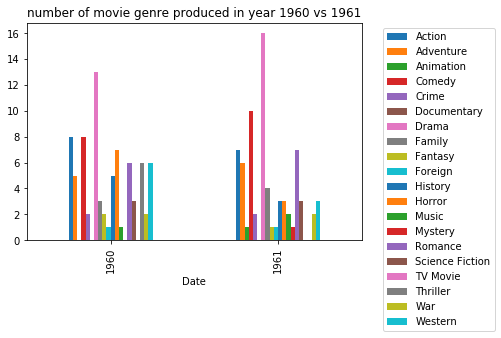

In [24]:
year1 = "1960"
year2 = "1961"
bar_plot(df_genres,"Date",year1,year2,"genre","popularity","number of movie genre produced in year "+ year1 + " vs "+year2 )

>The last question asked was what is the most famous genre in each year. I satrted with looping in every row and extracting every genre and date from every movie,then setting a dictionary of date as key that contains a dictionary of genres as values.
I constructed a dataframe from this map then selected the most famous genre from each year and these were how the results were displayed.it also seems that Drama was the most famous genre between the years. I also prepared a function that displays number of movies produced that belongs to genres and comparing it to another year.

<a id='conclusions'></a>
## Conclusions

> The analysis had many limitations  :
- 2015 is completely different from 1960 not only in number of fans, but in how famous certain genres were compared to the future.
- There is also the fact that number of people watching movies increased over number of years greatly
- The monetary value also changed,for example 1 dollar in the past was worth alot more that one dollar currently,so analyzing revenues and expenses might not be the best practice without a proper normalization.